In [1]:
import matplotlib.pyplot as plt
import numpy as np

from eegviz import EvData

In [2]:
# Load vhdr

vhdr_file = 'example/example_3.vhdr'

evdata = EvData(vhdr_file)

Loading example/example_3.vhdr with mne.io.read_raw_brainvision
Extracting parameters from example/example_3.vhdr...
Setting channel info structure...


/home/mu/aoki/work/eegviz/eegviz/eegviz.py:139: RuntimeWarning: No coordinate information found for channels ['HGL', 'HGR', 'SO', 'IO', 'SM1', 'SM2', 'ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(fname)
/home/mu/aoki/work/eegviz/eegviz/eegviz.py:139: RuntimeWarning: Not setting positions of 7 misc channels found in montage:
['HGL', 'HGR', 'SO', 'IO', 'SM1', 'SM2', 'ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  return mne.io.read_raw_brainvision(fname)


In [3]:
# Get some data information

# Channels
channels = evdata.channels
print(channels)

# Sampling frequency
sample_freq = evdata.sampling_frequency
print(sample_freq)

# Available event names
event_names = evdata.event_names
print(event_names)

['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'PO3', 'PO4', 'HGL', 'HGR', 'SO', 'IO', 'SM1', 'SM2', 'PO7', 'PO8', 'POz', 'ECG']
250.0
['New Segment/', 'SyncStatus/Sync On', 'Pulse Artifact/R', 'Response/R128', 'TPULSE/TSTART', 'TPULSE/TPEAK', 'TPULSE/TEND', 'Comment/Awaking', 'Comment/Sleeping']


In [4]:
# Get event times

awaking_times = evdata.get_event_onset_time('Comment/Awaking')
print(awaking_times)

awaking_timestamp = evdata.get_event_timestamp('Comment/Awaking')
print(awaking_timestamp)

awaking_duration = evdata.get_event_duration('Comment/Awaking')
print(awaking_duration)

[1202.24, 1718.0]
[Timestamp('2022-07-29 10:57:36.028674+0000', tz='UTC'), Timestamp('2022-07-29 10:57:36.028674+0000', tz='UTC')]
[0.004, 0.004]


In [5]:
# Get EEG data

# Get all data

data = evdata.get_data()
print(data.shape)

# Get data in given period (sec.)
data = evdata.get_data(period=[100, 120])
print(data.shape)

# Get data of given channel(s)
data = evdata.get_data(channel=['HGL', 'HGR'], period=[100, 120])
print(data.shape)

# Returns times as well
data,times = evdata.get_data(channel=['HGL', 'HGR'], period=[100, 120], return_times=True)
print(data.shape)
print(times.shape)
print(times)

(32, 492820)
(32, 5000)
(2, 5000)
(2, 5000)
(5000,)
[100.    100.004 100.008 ... 119.988 119.992 119.996]


In [6]:
# Get EEG data around given event

data_list = evdata.get_data_by_event('Comment/Awaking', pre=360, post=80)
print(len(data_list))
print(data_list[0].shape)

2
(32, 110001)


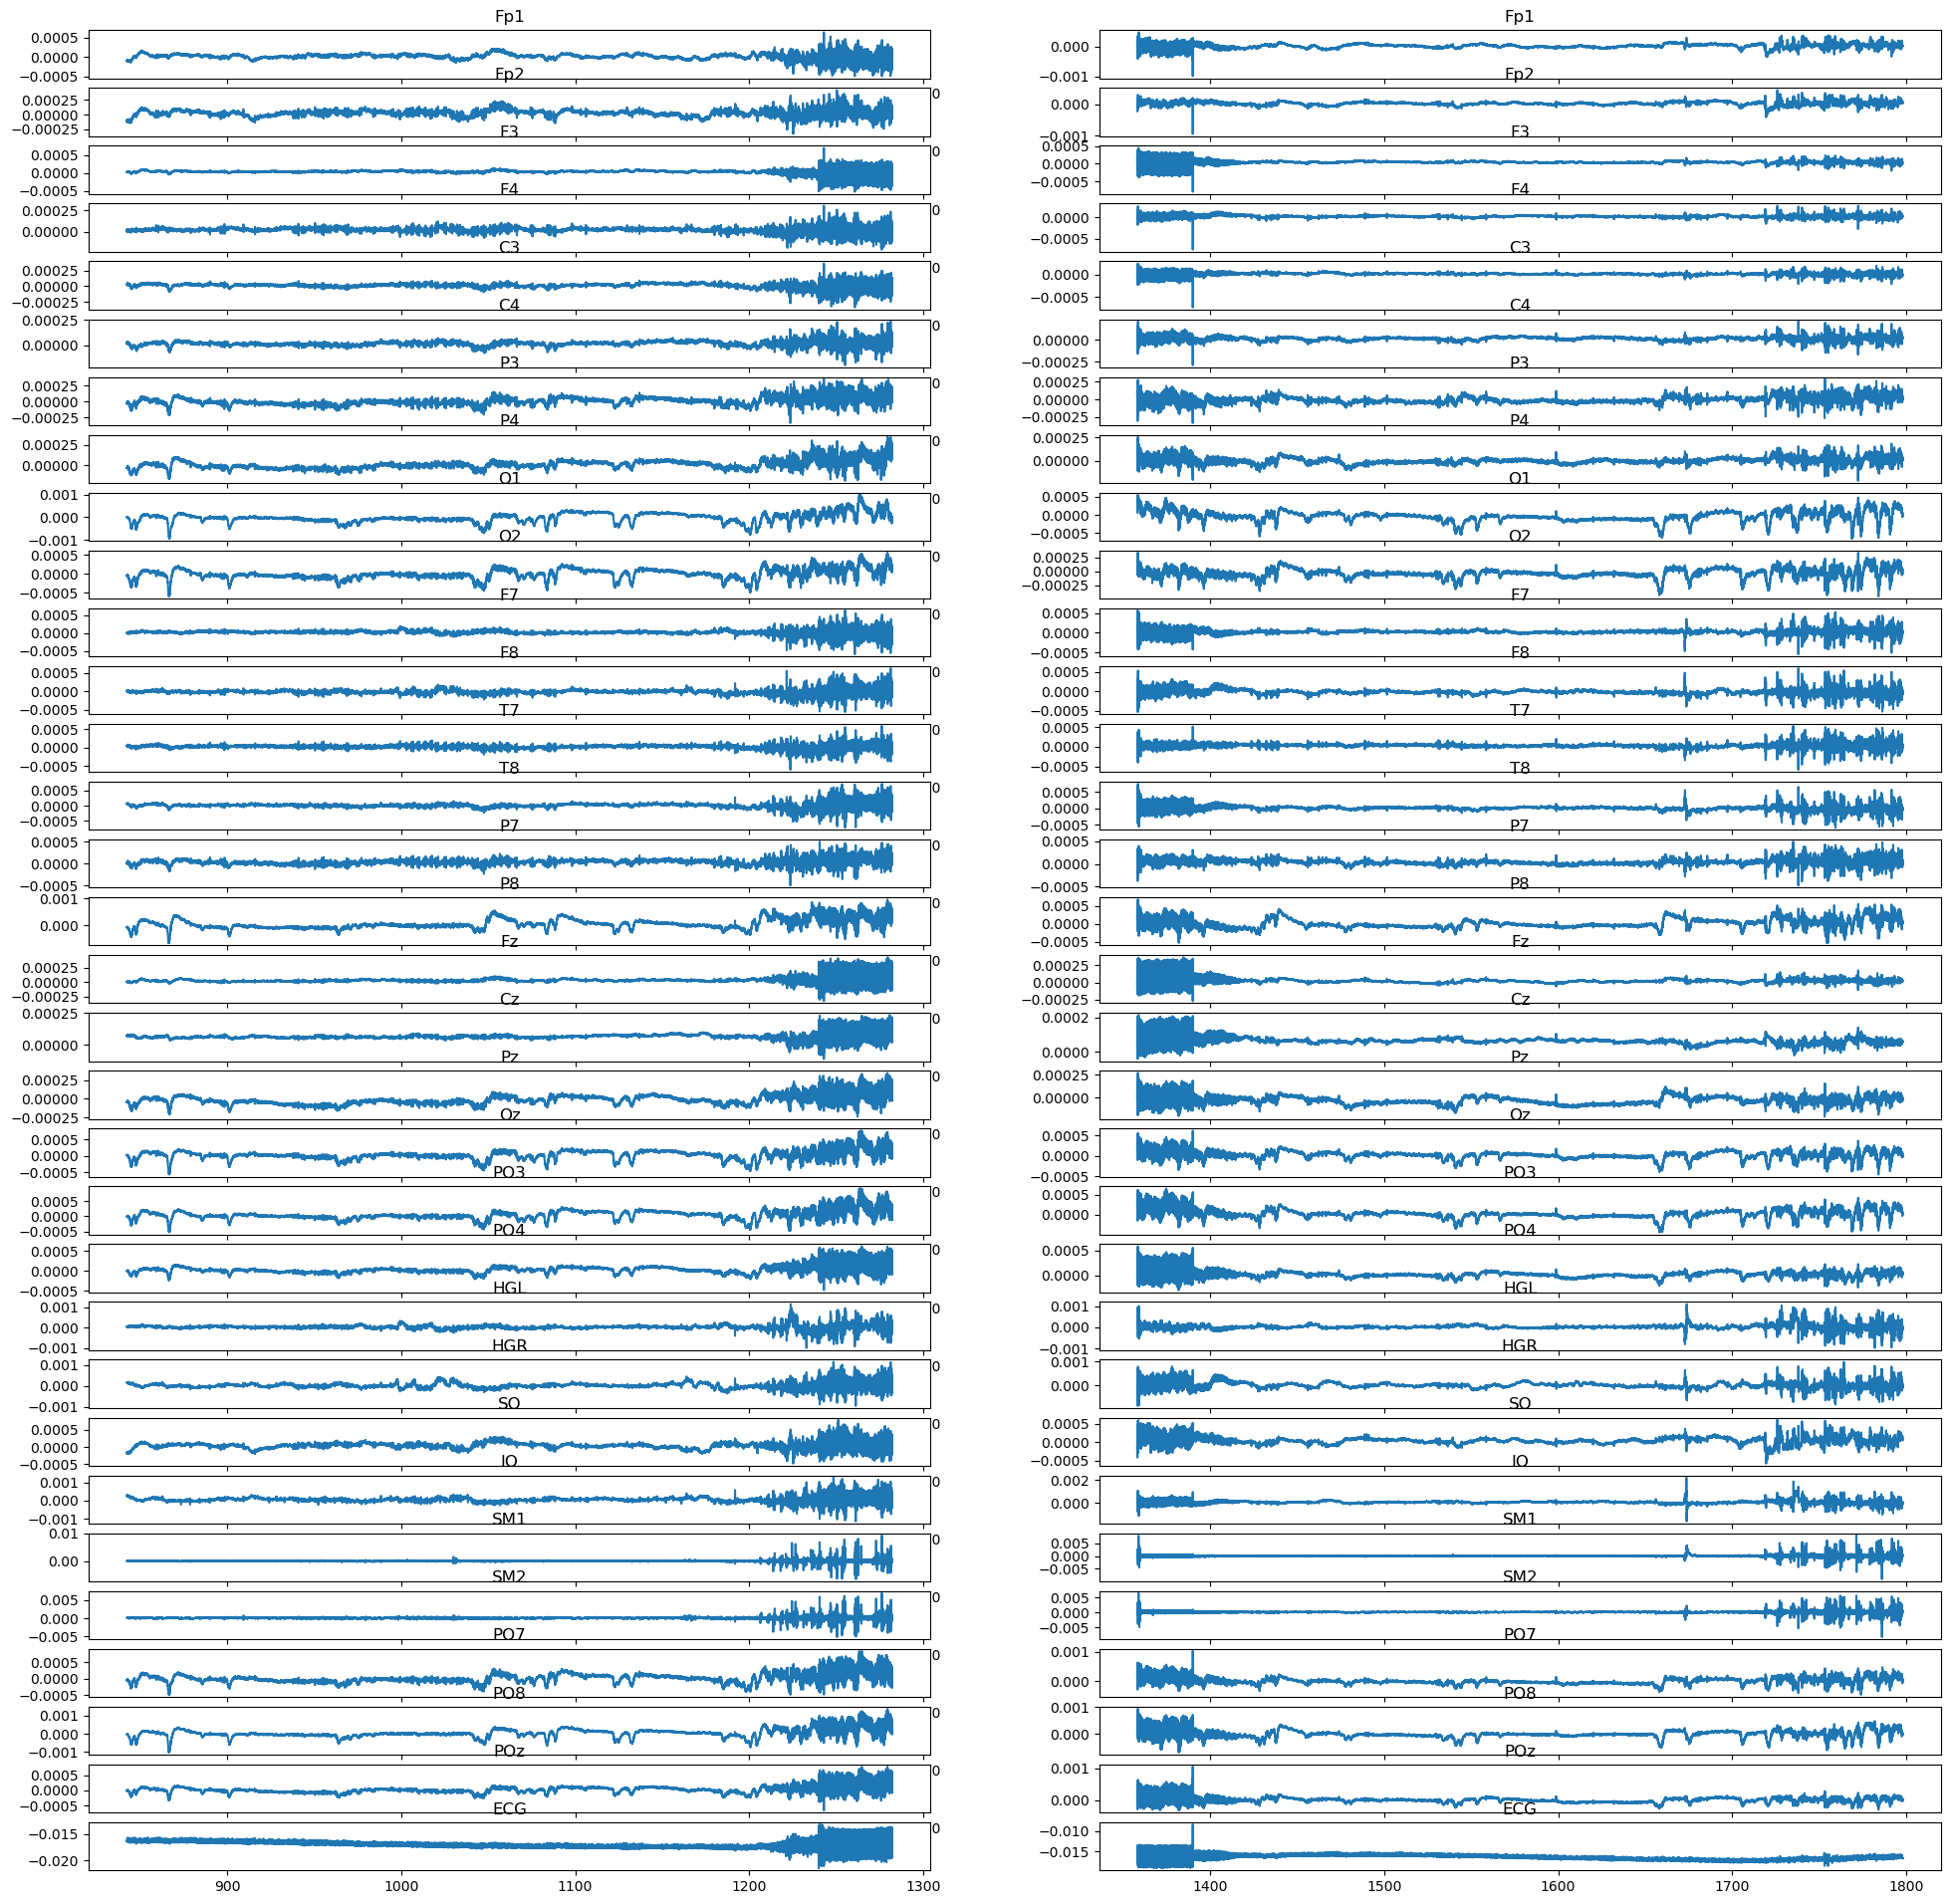

In [7]:
# Visualization example

data_list = evdata.get_data_by_event('Comment/Awaking', pre=360, post=80, return_times=True)


fig = plt.figure(figsize=(24, 24))

for i, data in enumerate(data_list):
    d = data[0]
    t = data[1]

    for j, ch in enumerate(evdata.channels):
        y = d[j, :]

        plt.subplot(len(evdata.channels), len(data_list), i + 1 + j * 2) 
        plt.plot(t, y)
        plt.title(ch)